# Project for Programming for DA
## Vitalijs Smirnovs
## ID: G00317774
### Lecturer: Dr. Brian McGinley

Data to be simulated:
Earnings in Galway county by age, gender and marital status.

Sources of original data:
https://statbank.cso.ie/px/pxeirestat/Statire/SelectVarVal/Define.asp?maintable=NSA87&PLanguage=0

https://statbank.cso.ie/px/pxeirestat/Statire/SelectVarVal/Define.asp?MainTable=E2028&TabStrip=Select&PLanguage=0&FF=1#

Four variables to be simulated:
- age
- gender
- marital status
- earnings

The hypothesis is that there are differences in the varibles by gender. So Gender is the first variable to be generated.
To know how many observations to simulate, I checked the CSO.ie data and Galway County (including Galway City) had a population of 258,058 people as counted in the last 2016 Srnsus of population. [https://statbank.cso.ie/px/pxeirestat/Statire/SelectVarVal/Define.asp?MainTable=E2028&TabStrip=Select&PLanguage=0&FF=1#]

The population of 258,058 people includes 127,663 Males and 130,395 Females, in proportions:
Male	0.494706616; 
Female	0.505293384. [https://statbank.cso.ie/px/pxeirestat/Statire/SelectVarVal/saveselections.asp]

In [21]:
# randomly choose male or female with probabilities 0.49 for male and 0.51 for female
age = np.random.choice(['Male','Female'],258058, p=[0.49,0.51], replace=True)
# how many values are generated?
print(len(age))
# record values into the dataframe
df = pd.DataFrame(data=age, columns=['gender'])
# view the head of dataframe
df.head()


258058


,gender
0,Female
1,Female
2,Female
3,Male
4,Male


Two variable of remaning three will presumably depend on age - marital status and earnings. So age is the next variable to be simulated.

### Age
https://statbank.cso.ie/px/pxeirestat/Statire/SelectVarVal/saveselections.asp



Age Group             N       Proportion   
All ages	        258058	
0 - 4 years	        17799	0.068972867
5 - 9 years	        18885	0.073181223
10 - 14 years	    17198	0.066643933
15 - 19 years	    16600	0.064326624
20 - 24 years	    16470	0.063822862
25 - 29 years	    15304	0.059304497
30 - 34 years	    18859	0.07308047
35 - 39 years	    21175	0.082055197
40 - 44 years	    19420	0.0752544
45 - 49 years	    17691	0.068554356
50 - 54 years	    15796	0.061211046
55 - 59 years	    14639	0.056727557
60 - 64 years	    13316	0.051600803
65 - 69 years	    11434	0.044307869
70 - 74 years	    8808	0.034131862
75 - 79 years	    6239	0.024176735
80 - 84 years	    4479	0.017356563
85 years and over	3946	0.015291136
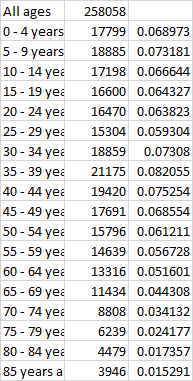

In [3]:
import pandas as pd
import seaborn as sn
import numpy as np

In [ ]:
age = np.array[]

In [4]:


df = pd.dataframe(['age'])

AttributeError: module 'pandas' has no attribute 'dataframe'

In [ ]:
df
